In [1]:
import pandas as pd

# Load the dataset to inspect the data types and null values
file_path = "C:/Users/User/Downloads/heroin_group.csv"
data = pd.read_csv(file_path)

# Display data types and null value counts
data_info = data.info()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               128 non-null    int64  
 1   sex               128 non-null    object 
 2   racegrp           128 non-null    object 
 3   homeless          128 non-null    object 
 4   substance         128 non-null    object 
 5   mcs               128 non-null    float64
 6   pcs               128 non-null    float64
 7   cesd              128 non-null    int64  
 8   pss_fr            128 non-null    int64  
 9   g1b               128 non-null    object 
 10  avg_drinks        128 non-null    int64  
 11  hospitalizations  128 non-null    int64  
 12  rabscores         128 non-null    float64
 13  satreat           128 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 14.1+ KB


In [3]:
descriptive_stats = data.describe(include='all')
descriptive_stats

,age,sex,racegrp,homeless,substance,mcs,pcs,cesd,pss_fr,g1b,avg_drinks,hospitalizations,rabscores,satreat
count,128.000000,128,128,128,128,128.000000,128.000000,128.000000,128.000000,128,128.000000,128.000000,128.000000,128
unique,NaN,2,4,2,1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,male,white,housed,heroin,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,no
freq,NaN,96,59,79,128,NaN,NaN,NaN,NaN,88,NaN,NaN,NaN,93
mean,33.570312,NaN,NaN,NaN,NaN,28.579524,45.695608,34.710938,6.773438,NaN,9.500000,2.054688,0.243164,NaN
std,7.965164,NaN,NaN,NaN,NaN,11.461639,9.790900,11.200501,4.049331,NaN,13.921037,2.911580,0.171196,NaN
min,19.000000,NaN,NaN,NaN,NaN,6.762923,21.919056,4.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,27.000000,NaN,NaN,NaN,NaN,20.107430,39.549202,27.750000,3.000000,NaN,0.000000,0.000000,0.100000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,27.608245,46.351936,35.000000,7.000000,NaN,4.000000,1.000000,0.200000,NaN
75%,39.000000,NaN,NaN,NaN,NaN,34.401465,52.372894,43.000000,10.250000,NaN,13.000000,2.000000,0.350000,NaN


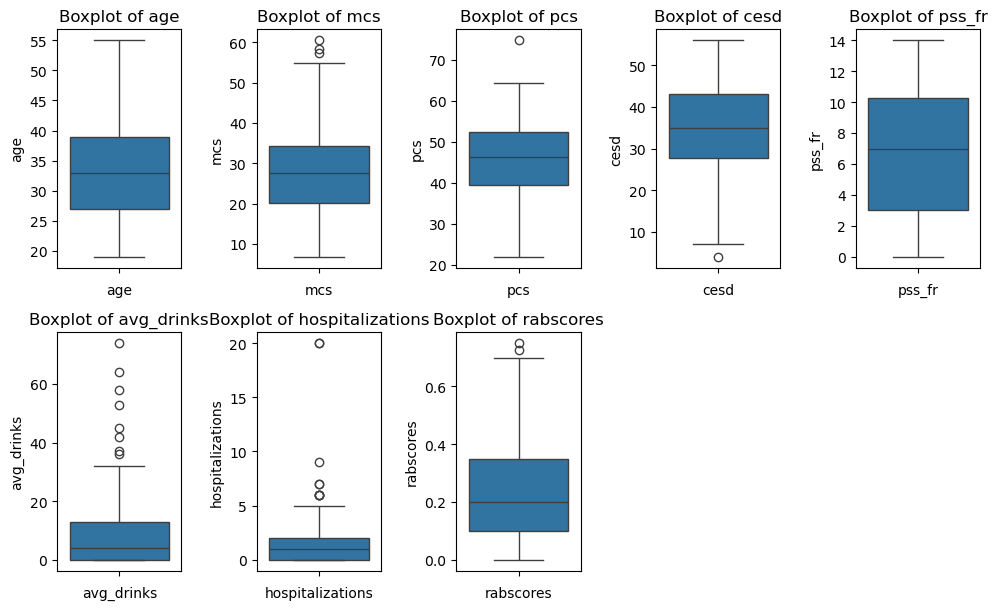

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on numerical columns
numerical_columns = ['age', 'mcs', 'pcs', 'cesd', 'pss_fr', 'avg_drinks', 'hospitalizations', 'rabscores']

# Create boxplots to check for outliers in numerical variables
plt.figure(figsize=(10, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


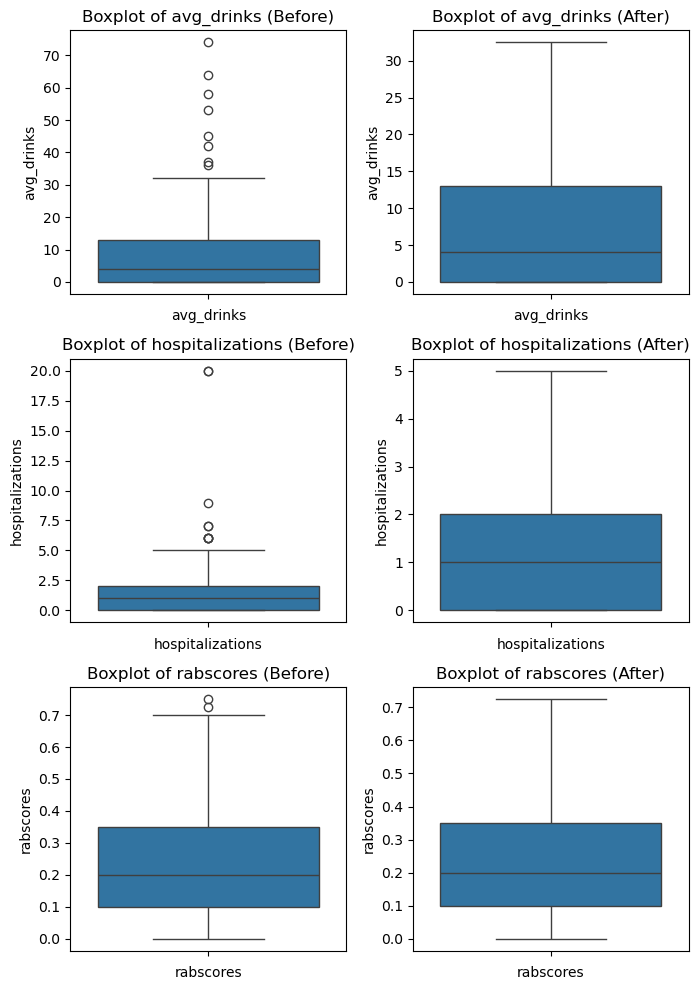

In [13]:
# Define a function to calculate outlier thresholds using the IQR method
def calculate_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to handle outliers by capping them at thresholds (Winsorization)
def cap_outliers(series):
    lower_bound, upper_bound = calculate_outlier_bounds(series)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Identify columns for outlier handling
columns_to_handle = ['avg_drinks', 'hospitalizations', 'rabscores']

# Apply the outlier capping function to each column
data_cleaned = data.copy()
for column in columns_to_handle:
    data_cleaned[column] = cap_outliers(data_cleaned[column])

# Display the summary statistics before and after outlier handling
summary_before = data[columns_to_handle].describe()
summary_after = data_cleaned[columns_to_handle].describe()


# Plot boxplots before and after outlier handling for visual comparison
plt.figure(figsize=(7, 10))
for i, column in enumerate(columns_to_handle, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column} (Before)')
    plt.xlabel(column)
    
    plt.subplot(3, 2, 2*i)
    sns.boxplot(data_cleaned[column])
    plt.title(f'Boxplot of {column} (After)')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [15]:
# Function to identify outliers before Winsorization
def identify_outliers(series):
    lower_bound, upper_bound = calculate_outlier_bounds(series)
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Identify outliers for each numerical variable before Winsorization
outliers_summary = {}
for column in numerical_columns:
    outliers = identify_outliers(data[column])
    outliers_summary[column] = {
        'Number of Outliers': len(outliers),
        'Outlier Values': outliers.tolist(),
        'Maximum values' : outliers.max()
    }

# Display the summary of outliers before Winsorization
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')
outliers_summary_df

,Number of Outliers,Outlier Values,Maximum values
age,0,[],NaN
mcs,3,"[58.4774703979492, 60.5420837402344, 57.489437...",60.542084
pcs,1,[74.8063278198242],74.806328
cesd,1,[4],4.000000
pss_fr,0,[],NaN
avg_drinks,8,"[58, 42, 64, 74, 36, 45, 37, 53]",74.000000
hospitalizations,9,"[6, 7, 7, 9, 6, 6, 20, 20, 6]",20.000000
rabscores,2,"[0.725, 0.75]",0.750000


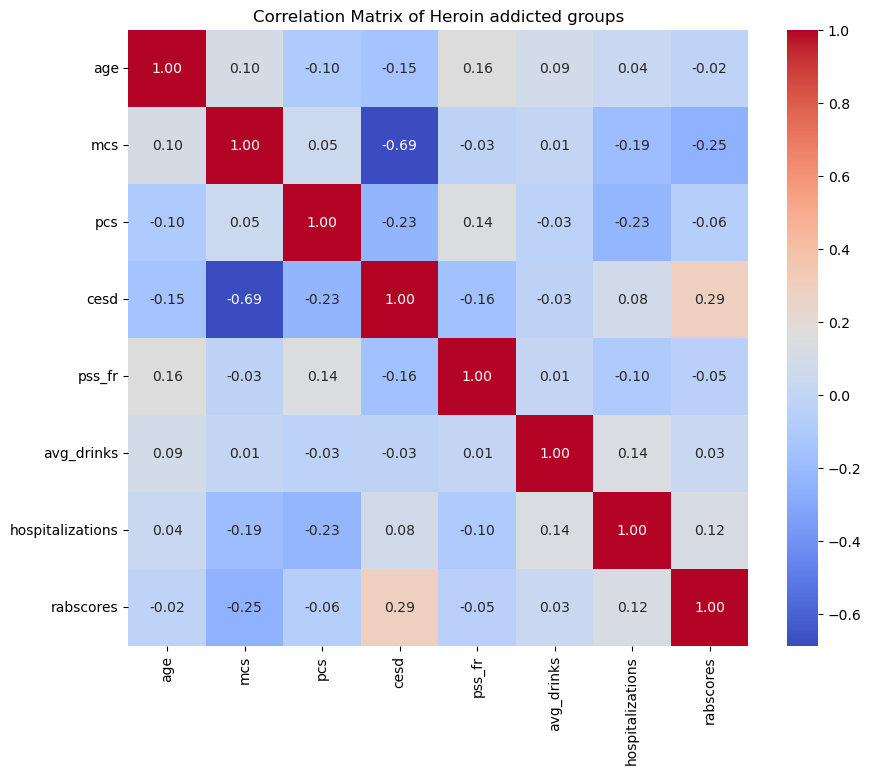

In [19]:
# Calculate correlation matrix after Winsorization
correlation_after = data_cleaned[numerical_columns].corr()

# Plot heatmap for the correlation matrix after Winsorization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_after, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Heroin addicted groups")
plt.show()


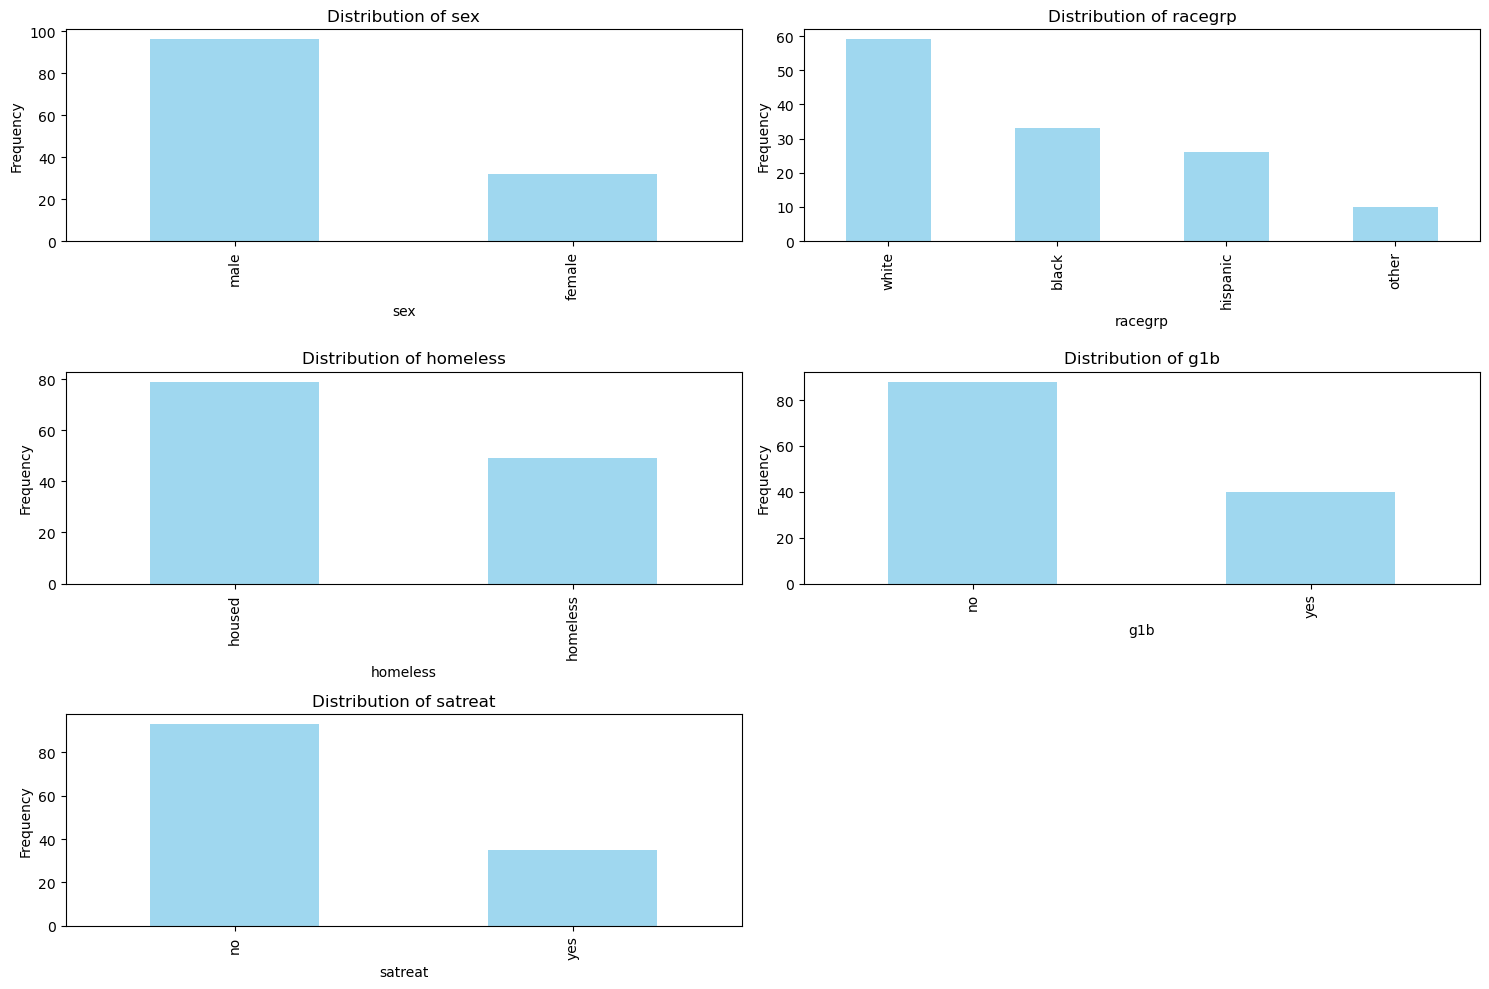

In [21]:
categorical_columns = ['sex', 'racegrp', 'homeless', 'g1b', 'satreat']

# Plot bar charts for the categorical variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    data[column].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()